In [1]:
from multiview.datasets.base import load_UCImultifeature
from multiview.embed.gcca import GCCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
help(load_UCImultifeature)

Help on function load_UCImultifeature in module multiview.datasets.base:

load_UCImultifeature(select_labeled='all')
    Load the UCI multiple features dataset, taken from
    https://archive.ics.uci.edu/ml/datasets/Multiple+Features
    This data set consists of 6 views of handwritten digit images, with
    classes 0-9. The 6 views are the following:
    
    1. 76 Fourier coefficients of the character shapes
    2. 216 profile correlations
    3. 64 Karhunen-Love coefficients
    4. 240 pixel averages of the images from 2x3 windows
    5. 47 Zernike moments
    6. 6 morphological features
    
    Each class contains 200 labeled examples.
    
    Parameters
    ----------
    select_labeled : optional, array-like, shape (n_features,) default (all)
        A list of the examples that the user wants by label. If not
        specified, all examples in the dataset are returned. Repeated labels
        are ignored.
    
    Returns
    -------
    data : list of np.ndarray, each of size 

In [2]:
# Load full dataset, labels not needed
Xs, y = load_UCImultifeature()

In [154]:
# Create GCCA object and embed the 
gcca = GCCA()
Xs_latents1 = gcca.fit_transform(Xs, n_components=2)
Xs_latents2 = gcca.fit_transform(Xs[:2], fraction_var = 0.90)

Text(0.5, 1.0, 'Embeddings of the Averaged Views')

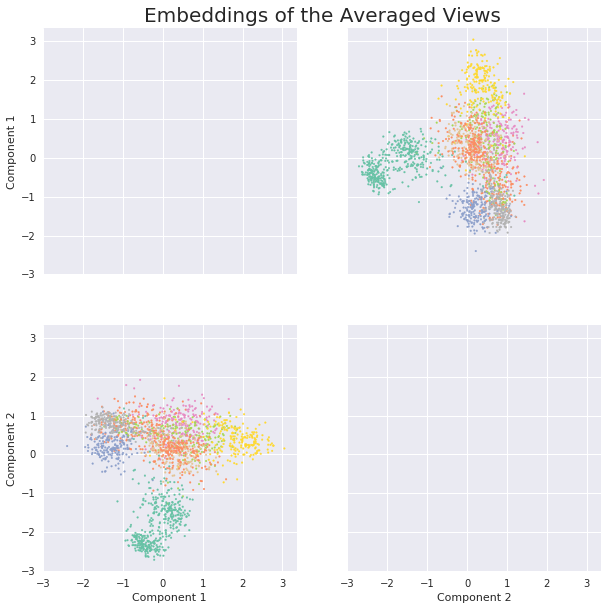

In [155]:
plt.style.use('seaborn')

n = 2
Xs_latents = Xs_latents2[0]#np.mean(Xs_latents2, axis=0)

color_map_scatter = [sns.color_palette("Set2", 10)[int(i)] for i in y]
color_map_hist = [sns.color_palette("Set2", 10)[int(i)] for i in np.unique(y)]

fig, axes = plt.subplots(n,n,figsize=(10,10), sharey=True, sharex=True)

for i in range(n):
    for j in range(n):
        if not i == j:
            #for g in np.unique(y):
            #    idx = np.where(y == g)
            #    axes[i,j].scatter(x=Xs_latents2[0][:,i][idx], y=Xs_latents2[0][:,j][idx], alpha=1, label=g, color=[color_map_scatter[index] for index in idx[0]], s=3)
            axes[i,j].scatter(x=Xs_latents[:,i], y=Xs_latents[:,j], alpha=1, label=y, color=color_map_scatter, s=3)
        axes[n-1,j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')
#axes[0,n-1].legend()
ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('Embeddings of the Averaged Views', fontsize=20)

## Euclidean Distances

In [19]:
pairwise_distances = np.linalg.norm(Xs_latents2[0] -Xs_latents2[1], ord=2, axis=1)

In [22]:
distances = Xs_latents2[0] - Xs_latents2[1]

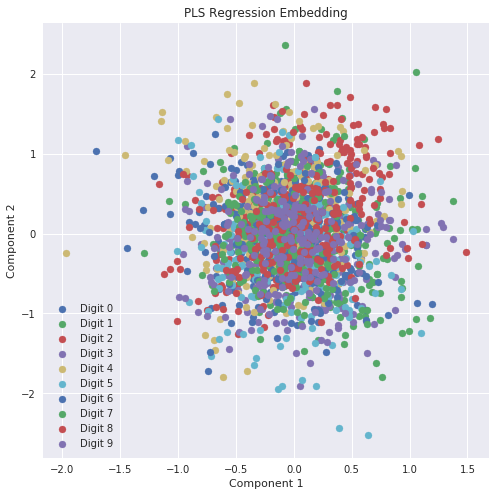

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
for g in np.unique(y):
    i = np.where(y == g)
    ax.scatter(distances[:,0][i], distances[:,1][i], label=f'Digit {int(g)}')
ax.legend()
plt.title('PLS Regression Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [65]:
from matplotlib.patches import Ellipse

In [70]:
def get_ellipses(X):
    centroids = []
    stds = []
    for i in np.sort(np.unique(y)):
        idx = np.where(y == i)
        centroids.append(np.mean(X[idx],axis=0))
        stds.append(np.std(X[idx],axis=0))
    return(centroids, stds)

In [135]:
centroids1,stds1 = get_ellipses(Xs_latents2[0])
centroids2,stds2 = get_ellipses(Xs_latents2[1])

Text(0.5, 1.0, 'GCCA Projected View Distributions per Class')

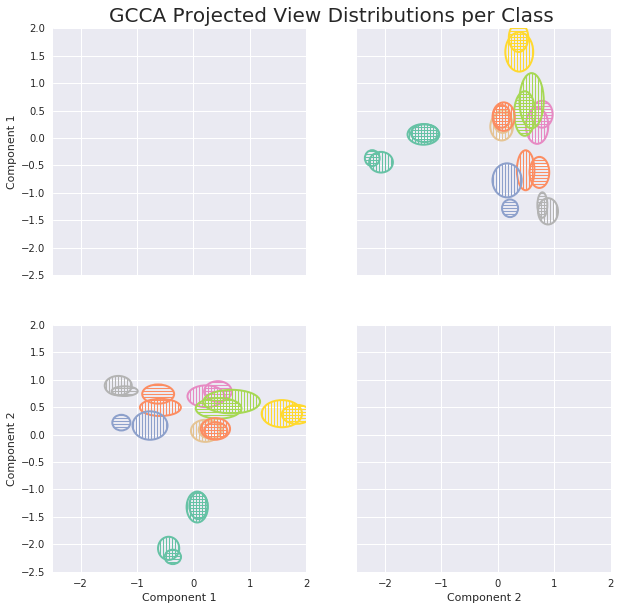

In [136]:
plt.style.use('seaborn')

n = 2

color_map_scatter = [sns.color_palette("Set2", 10)[int(i)] for i in y]
color_map_hist = [sns.color_palette("Set2", 10)[int(i)] for i in np.unique(y)]

fig, axes = plt.subplots(n,n,figsize=(10,10), sharey=True, sharex=True)

for i in range(n):
    for j in range(n):
        if not i == j:
            for g in np.sort(np.unique(y)).astype(int):
                e = Ellipse(xy=centroids1[g][[i,j]], width=stds1[g][i], height=stds1[g][j])#, angle=0)
                axes[i,j].add_artist(e)
                e.set_clip_box(axes[i,j].bbox)
                e.set_alpha(1)
                e.set_edgecolor(sns.color_palette("Set2", 10)[g])
                e.set_fill(False)
                e.set_hatch('----')
                e.set_lw(2)
                
                e = Ellipse(xy=centroids2[g][[i,j]], width=stds2[g][i], height=stds2[g][j])#, angle=0)
                axes[i,j].add_artist(e)
                e.set_clip_box(axes[i,j].bbox)
                e.set_alpha(1)
                e.set_edgecolor(sns.color_palette("Set2", 10)[g])
                e.set_fill(False)
                e.set_hatch('||||')
                e.set_lw(2)
    
        axes[n-1,j].set_xlabel(f'Component {j+1}')
        axes[i,j].set_xlim(-2.5, 2)
        axes[i,j].set_ylim(-2.5, 2)
    axes[i,0].set_ylabel(f'Component {i+1}')

ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('GCCA Projected View Distributions per Class', fontsize=20)

No handles with labels found to put in legend.


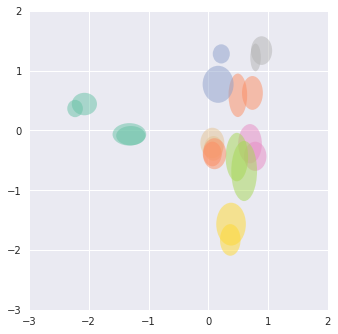

In [102]:
fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
i = 0
j = 1
for g in np.sort(np.unique(y)).astype(int):
    e = Ellipse(xy=centroids1[g][[i,j]], width=stds1[g][i], height=stds1[g][j])#, angle=0)
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.5)
    e.set_facecolor(sns.color_palette("Set2", 10)[g])
 
    e = Ellipse(xy=centroids2[g][[i,j]], width=stds2[g][i], height=stds2[g][j])#, angle=0)
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.5)
    e.set_facecolor(sns.color_palette("Set2", 10)[g])
ax.legend()
    
ax.set_xlim(-3, 2)
ax.set_ylim(-3, 2)

plt.show()